In [153]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

In [154]:
data=pd.read_csv('train.csv')

In [155]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
Y=Y_train
X_train = data_train[1:n]
X_train = X_train / 255
_,m_train = X_train.shape


In [156]:
def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y
Y_train=one_hot(Y_train)
Y_dev=one_hot(Y_dev)

In [157]:
test_data=(X_dev,Y_dev)

In [158]:
training_data=(X_train,Y_train)

In [159]:
i=0

In [160]:
def Init_para(neurons):
    neurons=neurons
    l=len(neurons)
    bias=[np.random.randn(y,1)for y in neurons[1:]] 
    weights=[np.random.randn(y,x)for x,y in zip (neurons[:-1],neurons[1:])]
    layers=l
    return bias,weights,layers

In [161]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    y=np.argmax(Y)
    return np.sum(predictions == y) 

In [162]:
def update_mini_batch(mini_batch,learning_rate,bias,weights,layers,m):
    x_all=mini_batch[0]
    y_all=mini_batch[1]
    for x,y in zip(x_all.T,y_all.T):
        x=np.reshape(x,(len(x),1))
        y=np.reshape(y,(len(y),1))
        activations,z_all=feedForward(x,y,bias,weights,layers)
        derivative_bias,derivative_weights=backpropogation(x,y,bias,weights,layers)
        bias=[b-(learning_rate*derivative_each_bias) for derivative_each_bias,b in zip(derivative_bias,bias)]
        weights=[w-(learning_rate*derivative_each_weight) for derivative_each_weight,w in zip(derivative_weights,weights)]
        predictions = get_predictions(activations[-1])
        m+=get_accuracy(predictions,y)
    return bias,weights,m

In [163]:
def SDG(training_data,epochs,mini_batch_size,learning_rate,test_data=None):
    bias,weights,layers=Init_para([784,30,10])
    if test_data:
        n_test = len(test_data[0][0])
    n=len(X_train[0])
    for i in range(epochs):
        m=0
        mini_batches=[(training_data[0][:,k:k+mini_batch_size],training_data[1][:,k:k+mini_batch_size])
                      for k in range(0,n,mini_batch_size)]
        for mini_batch in mini_batches:
            bias,weights,m=update_mini_batch(mini_batch,learning_rate,bias,weights,layers,m)
        print(f"Epoch:{i},Accuracy:{m/X_train[1].shape*100}")
    return weights,bias

In [164]:
def sigmoid(z):
    return 1.0/(1.0+np.exp(-z))

In [165]:
def relu(z):
    return np.maximum(0,z)

In [166]:
def relu_derivative(z):
    z[z<=0]=0
    z[z>0]=1
    return z

In [167]:
def feedForward(x,y,bias,weights,layers):
    activation=x
    activations=[x]
    z_all=[]
    for b,w in zip(bias,weights):
        k=np.dot(w,activation)
        z=k+b
        z_all.append(z)
        activation=sigmoid(z)
        activations.append(activation)
    return activations,z_all

In [168]:
def loss_function_derivative(Y_pred,Y_true):
    return (Y_pred-Y_true)

In [169]:
def sigmoid_derivative(z):
    return sigmoid(z)*(1-sigmoid(z))

In [170]:
def backpropogation(x,y,bias,weights,layers):
    derivative_bias=[np.zeros(b.shape) for b in bias]
    derivative_weights=[np.zeros(w.shape) for w in weights]
    #Forward Pass
    activations,z_all=feedForward(x,y,bias,weights,layers)
    #Backward pass
    loss_delta=loss_function_derivative(activations[-1],y)*sigmoid_derivative(z_all[-1])
    derivative_bias[-1]=loss_delta
    derivative_weights[-1]=np.dot(loss_delta,activations[-2].T)
    for layer in range(2,layers):
        z=z_all[-layer]
        s_derivative=sigmoid_derivative(z)
        loss_delta=np.dot(weights[-layer+1].T,loss_delta)*s_derivative
        derivative_bias[-layer]=loss_delta
        derivative_weights[-layer]=np.dot(loss_delta,activations[-layer-1].T)
    return derivative_bias,derivative_weights
    

In [171]:
def evaluate(test_data):
    correct=0
    x_test_all=test_data[0]
    y_test_all=test_data[1]
    for x,y in zip(x_test_all.T,y_test_all.T):
        x=np.reshape(x,(784,1))
        y=np.reshape(y,(10,1))
        k=np.argmax(feedForward(x))
        m=np.argmax(y)
        if k==m:
            correct+=1
    return correct

In [ ]:
w,b=SDG(training_data,50,10,0.1,test_data)

In [182]:
def make_predictions(X,w,b):
    activations,_ = feedForward(X,0,b,w,3)
    predictions = get_predictions(activations[-1])
    return predictions

def test_prediction(index,w,b):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None],w,b)
    label = Y_train[:,index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [6]
Label:  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


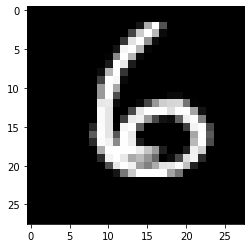

In [184]:
test_prediction(8,w,b)